In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [251]:
df = pd.read_csv('Boston.csv')

In [252]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [254]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [255]:
X_df = df.drop(['Unnamed: 0', 'medv'], axis=1).values
y_df = df['medv'].values.reshape(-1,1)

In [256]:
print(X_df.shape)
print(y_df.shape)

(506, 13)
(506, 1)


In [257]:
np.random.seed(20)
indices = np.arange(X_df.shape[0])
np.random.shuffle(indices)
X_df = X_df[indices]
y_df = y_df[indices]

In [258]:
split = int(0.8 * X_df.shape[0])

Splitting into train and test in case of overfitting

In [259]:
X_train, X_test = X_df[:split], X_df[split:]
y_train, y_test = y_df[:split], y_df[split:]

In [260]:
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

X_train shape: (404, 13) y_train shape: (404, 1)
X_test shape: (102, 13) y_test shape: (102, 1)


Removing outliers

In [261]:
def remove_outliers_iqr(X, y, factor=7):
    Q1 = np.percentile(X, 25, axis=0)
    Q3 = np.percentile(X, 75, axis=0)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    mask = np.all((X >= lower_bound) & (X <= upper_bound), axis=1)
    return X[mask], y[mask]

In [262]:
X_train, y_train = remove_outliers_iqr(X_train, y_train)

In [263]:
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)

X_train shape: (283, 13) y_train shape: (283, 1)


Normalizing train dataset

In [264]:
def zscore_normalize_features(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    sigma[sigma == 0] = 1.0
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [265]:
X_train, X_mu, X_sigma = zscore_normalize_features(X_train)

In [266]:
X_test = (X_test - X_mu) / X_sigma      # Use same mean and standard deviation of X_train

Implementing PCA for better visualization

In [267]:
def pca(X, n_components=1):
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_idx]
    components = eigenvectors[:, :n_components]
    X_reduced = np.dot(X_centered, components)
    return X_reduced, components

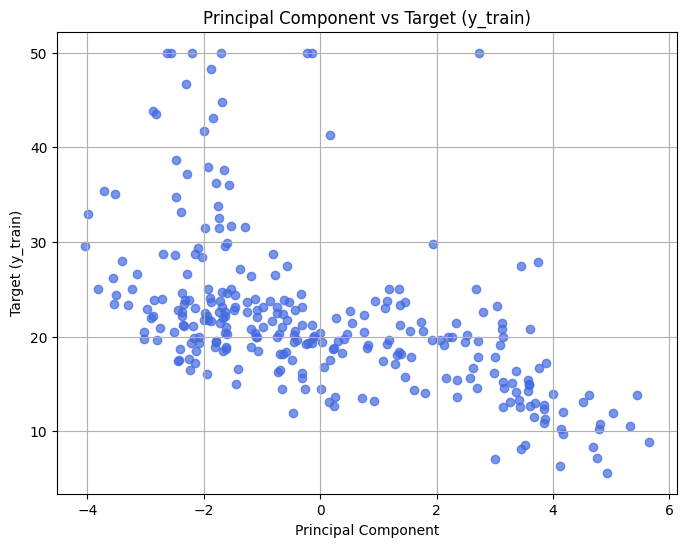

In [268]:
X_pca, _ = pca(X_train, n_components=1)
X_pca = X_pca.flatten()
y_train_flat = y_train.flatten()

plt.figure(figsize=(8,6))
plt.scatter(X_pca, y_train_flat, color='royalblue', alpha=0.7)
plt.title("Principal Component vs Target (y_train)")
plt.xlabel("Principal Component")
plt.ylabel("Target (y_train)")
plt.grid(True)
plt.show()

In [269]:
m ,n = X_train.shape

In [270]:
w_init = np.random.randn(n, 1) * 0.01 
b_init = np.random.randn() * 0.01    
lambd = 0

In [271]:
def compute_cost(X, y, w, b, lambd):
    m = X.shape[0]
    f_wb = np.dot(X, w) + b
    errors = f_wb - y
    cost = np.sum(errors**2) / (2 * m)
    cost += (lambd / (2 * m)) * np.dot(w.T, w).item()
    return cost

In [272]:
cost = compute_cost(X_train, y_train, w_init, b_init, lambd)
print(f'Cost at chosen w and b: {cost}')

Cost at chosen w and b: 273.1614004673005


In [273]:
def compute_gradient(X, y, w, b, lambd):
    m, n = X.shape
    f_wb = np.dot(X, w) + b
    errors = f_wb - y
    dj_dw = (np.dot(X.T, errors) / m) + (lambd / m) * w
    dj_db = np.sum(errors) / m
    return dj_db, dj_dw

In [274]:
dj_db, dj_dw = compute_gradient(X_train, y_train, w_init, b_init, lambd)
print(f'dj_db at initial w,b: {dj_db}')
print(f'dj_dw at initial w,b: \n {dj_dw}')

dj_db at initial w,b: -21.836733401426212
dj_dw at initial w,b: 
 [[ 3.47152884]
 [-1.65079666]
 [ 3.50011862]
 [ 0.        ]
 [ 2.7203926 ]
 [-5.84620547]
 [ 2.50472448]
 [-0.9927925 ]
 [ 2.71104823]
 [ 3.64459932]
 [ 4.04735482]
 [-1.19877573]
 [ 5.95752413]]


In [275]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambd):
    J_history = []
    w = w_in.copy()
    b = b_in
    for i in range(num_iters):
        dj_db,dj_dw = gradient_function(X, y, w, b, lambd)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i<100000:                                    
            J_history.append( cost_function(X, y, w, b, lambd))
        if i % math.ceil(num_iters / 10) == 0:          
            print(f"Iteration {i}: Cost {J_history[-1]}   ")
    return w, b, J_history

Training

In [276]:
iterations = 1000
alpha = 0.005
lambd = 0.5
w_final, b_final, J_hist = gradient_descent(X_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations, lambd)
b_final = float(b_final)
print(f"b,w found by gradient descent: {b_final:0.2f}, {w_final}")

Iteration 0: Cost 270.0424948408291   
Iteration 100: Cost 100.74519823168313   
Iteration 200: Cost 42.9929015992142   
Iteration 300: Cost 21.979883834947586   
Iteration 400: Cost 14.266264513081493   
Iteration 500: Cost 11.39685173136669   
Iteration 600: Cost 10.30125991269577   
Iteration 700: Cost 9.85992951192677   
Iteration 800: Cost 9.663062752609292   
Iteration 900: Cost 9.559944747711457   
b,w found by gradient descent: 21.71, [[-0.58888228]
 [ 0.32448315]
 [-0.48354219]
 [-0.00943194]
 [-0.66215703]
 [ 3.05942537]
 [-0.63536815]
 [-2.09637325]
 [ 1.04217137]
 [-0.87467385]
 [-2.05806876]
 [-0.10011054]
 [-2.99516921]]


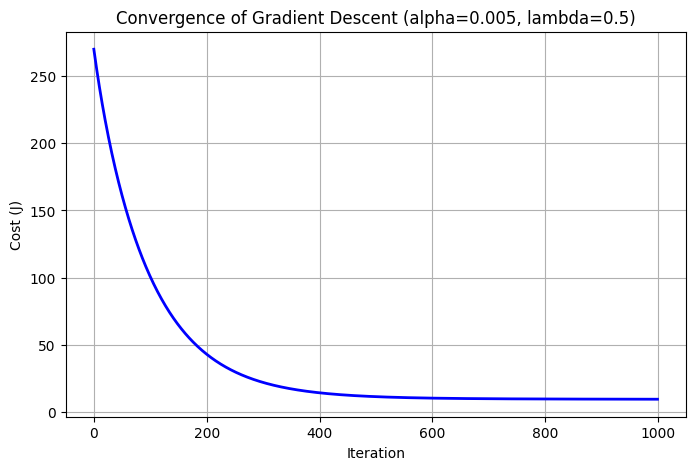

In [277]:
plt.figure(figsize=(8,5))
plt.plot(range(len(J_hist)), J_hist, color='b', linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Cost (J)")
plt.title(f"Convergence of Gradient Descent (alpha={alpha}, lambda={lambd})")
plt.grid(True)
plt.show()

In [278]:
def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

Predicting

In [279]:
y_pred_train = np.dot(X_train, w_final) + b_final
y_pred_test = np.dot(X_test, w_final) + b_final
r2_train = r_squared(y_train.flatten(), y_pred_train.flatten())
r2_test = r_squared(y_test.flatten(), y_pred_test.flatten())
print(f"R_2 train: {r2_train},\nR_2 test: {r2_test}")

R_2 train: 0.727926975302333,
R_2 test: 0.7425593087849971


In [280]:
# iterations = 1000
# alpha = 0.005
# lambd = 0.5

# Before Outlier Removal ->
# R_2 train: 0.727940062567354,
# R_2 test: 0.7366791220387948

# After Outlier Removal ->
# R_2 train: 0.727926975302333,
# R_2 test: 0.7425593087849971